In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets
from neural_network import NeuralNetwork

from opt_utils import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def show_costs(costs, learning_rate):
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

def plot_decision_boundary(nn, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z = nn.predict(Z.T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
             
    plt.show()


## Model with different optimization algorithms

In this notebook I will train my personally-implemented neural network using 3 different optimization algorithms: gradient descent, momentum, and adam

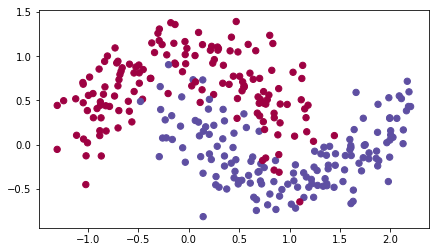

In [3]:
train_X, train_Y = load_dataset()

### Mini-batch Gradient descent

Cost after epoch 0/10000: 0.6693952460453744
Cost after epoch 1000/10000: 0.5518035480627488
Cost after epoch 2000/10000: 0.4780389932425523
Cost after epoch 3000/10000: 0.2622686301385688
Cost after epoch 4000/10000: 0.27347313669697154
Cost after epoch 5000/10000: 0.4393989124977486
Cost after epoch 6000/10000: 0.3141060944328869
Cost after epoch 7000/10000: 0.4277955573697001
Cost after epoch 8000/10000: 0.4113521883760914
Cost after epoch 9000/10000: 0.286503092681485
Train accuracy: 87.33333333333333%


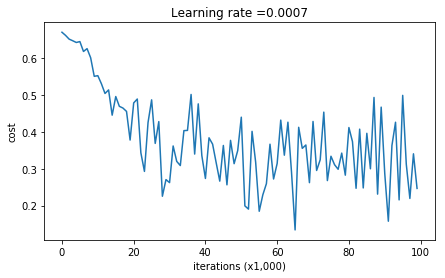

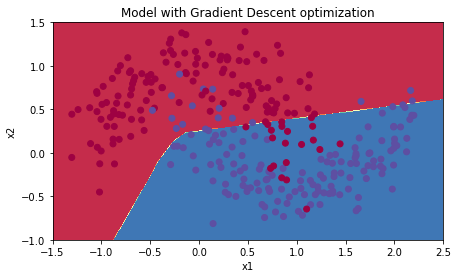

In [4]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
nn = NeuralNetwork(layers_dims, init_method='he')
costs = nn.train(train_X, train_Y, learning_rate = 0.0007, batch_size = 64, num_epochs = 10000, optimizer = 'gd', beta1=0.9, beta2=0.999, epsilon=10**-8)

# Predict
predictions = nn.predict(train_X)
NeuralNetwork.print_accuracy(predictions, train_Y, 'Train')

show_costs(costs,0.0007)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(nn, train_X, train_Y)

### Mini-batch gradient descent with momentum

Cost after epoch 0/10000: 0.6976144502927145
Cost after epoch 1000/10000: 0.5327151158795798
Cost after epoch 2000/10000: 0.5120732360279506
Cost after epoch 3000/10000: 0.4136295878397931
Cost after epoch 4000/10000: 0.454128781005329
Cost after epoch 5000/10000: 0.4580927643724362
Cost after epoch 6000/10000: 0.295659186219663
Cost after epoch 7000/10000: 0.3868083272969508
Cost after epoch 8000/10000: 0.28657386254486605
Cost after epoch 9000/10000: 0.4010678097193379
Train accuracy: 85.0%


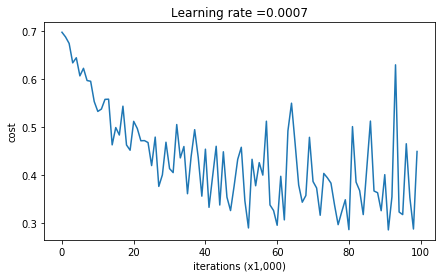

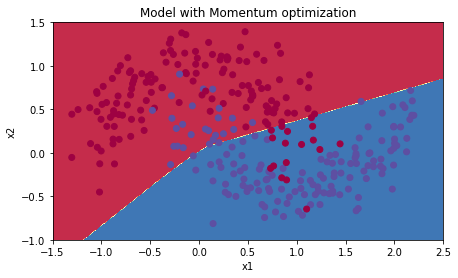

In [5]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
nn = NeuralNetwork(layers_dims, init_method='he')
costs = nn.train(train_X, train_Y, learning_rate = 0.0007, batch_size = 64, num_epochs = 10000, optimizer = 'momentum', beta1=0.9, beta2=0.999, epsilon=10**-8)

# Predict
predictions = nn.predict(train_X)
NeuralNetwork.print_accuracy(predictions, train_Y, 'Train')

show_costs(costs,0.0007)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(nn, train_X, train_Y)

Modest gain.  Definitely began to converge more quickly

### Mini-batch with Adam mode

Cost after epoch 0/10000: 0.7039808080710257
Cost after epoch 1000/10000: 0.19536221317381455
Cost after epoch 2000/10000: 0.15598140878220215
Cost after epoch 3000/10000: 0.10879098409828951
Cost after epoch 4000/10000: 0.21301407331955938
Cost after epoch 5000/10000: 0.1387029756242332
Cost after epoch 6000/10000: 0.09124175274573794
Cost after epoch 7000/10000: 0.07424898302220224
Cost after epoch 8000/10000: 0.19712458366053226
Cost after epoch 9000/10000: 0.047258927786059626
Train accuracy: 94.33333333333334%


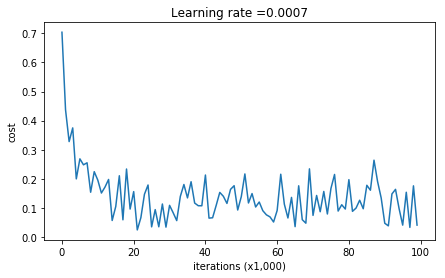

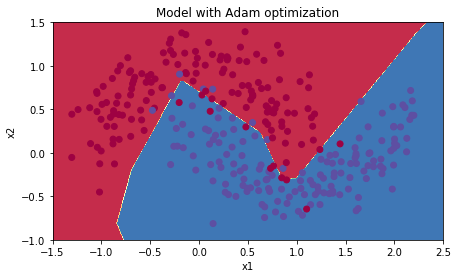

In [7]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
nn = NeuralNetwork(layers_dims, init_method='he')
costs = nn.train(train_X, train_Y, learning_rate = 0.0007, batch_size = 64, num_epochs = 10000, optimizer = 'adam', beta1=0.9, beta2=0.999, epsilon=10**-8)

# Predict
predictions = nn.predict(train_X)
NeuralNetwork.print_accuracy(predictions, train_Y, 'Train')

show_costs(costs,0.0007)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(nn, train_X, train_Y)

Adam converges much more quickly leading to large performance gain